In [ ]:
#The purpose of this is to compare the workings of the Sample Mean Absolute Deviation vs. the Sample Standard Deviation
#Using the (n-1) demoninator for Sample SD corrects for the underestimation of the pop. SD from using (n) alone
#Analyzing how this compares to MAD.

In [1]:
import math
import random
import numpy as np
import time
import csv
from matplotlib import pyplot as plt

In [2]:
#Can use any of the populations below for the analysis, this iteration uses male heights.
male_heights = []
female_heights = []
male_weights = []
female_weights = []
count = 0

In [3]:
with open('weight-height.csv', 'r+') as file:
    reader = csv.reader(file)
    for row in reader:
        if count > 0:
            if row[0] == 'Male':
                male_heights.append(float(row[1]))
                male_weights.append(float(row[2]))
            else:
                female_heights.append(float(row[1]))
                female_weights.append(float(row[2]))
        count += 1

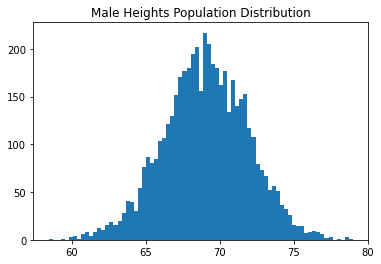

In [14]:
#Ensuring the population data is normally distributed
plt.hist(male_heights, bins=75)
plt.title('Male Heights Population Distribution')
plt.show()

In [74]:
male_heights_mean = np.mean(male_heights)
abs_distance = 0
sqd_distance = 0
for height in male_heights:
    abs_distance += abs(height - male_heights_mean)
    sqd_distance += (height - male_heights_mean) ** 2
popmad = abs_distance / len(male_heights)
popsd = math.sqrt(sqd_distance/len(male_heights))
print('Population Mean', male_heights_mean)
print('Population MAD', popmad)
print('Population SD', popsd)

Population Mean 69.02634590621741
Population MAD 2.2742081876625084
Population SD 2.8630758781195405


In [42]:
#Sample percentage and test range vals are arbitrary
sample_percentage = .005
test_range = 250000

#Creating lists for sample values calculated with 'n' and 'n-1'
sample_madsn = []
sample_sdsn = []
sample_madsone = []
sample_sdsone = []

In [48]:
#value to stop at in shuffled list
limit = int(sample_percentage*len(male_heights))

for x in range(test_range):
    random.shuffle(male_heights)
    male_heights_mean = np.mean(male_heights[:limit])
    abs_distance = 0
    sqd_distance = 0
    for height in male_heights[:limit]:
        abs_distance += abs(height - male_heights_mean)
        sqd_distance += (height - male_heights_mean) ** 2
    
    madn = abs_distance / limit
    madone = abs_distance / (limit-1)
    sample_madsn.append(madn)
    sample_madsone.append(madone)
    
    sdn = math.sqrt(sqd_distance / limit)
    sdone = math.sqrt(sqd_distance / (limit-1))
    sample_sdsn.append(sdn)
    sample_sdsone.append(sdone)

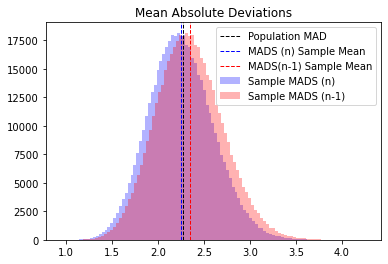

In [62]:
#Mean Absolute Deviations
plt.hist(sample_madsn, bins = 100, color='blue', alpha=.3, label='Sample MADs (n)')
plt.hist(sample_madsone, bins = 100, color='red', alpha=.3, label ='Sample MADs (n-1)')
plt.axvline(popmad, color='black', linestyle='dashed', linewidth=1, label = 'Population MAD')
plt.axvline(np.mean(sample_madsn), color='blue', linestyle='dashed', linewidth=1, label='MADs (n) Sample Mean')
plt.axvline(np.mean(sample_madsone), color='red', linestyle='dashed', linewidth=1, label='MADs (n-1) Sample Mean')
plt.title('Mean Absolute Deviations')
plt.legend()
plt.show()

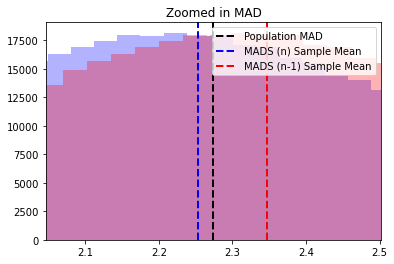

In [71]:
#Zoomed in MAD
plt.hist(sample_madsn, bins = 100, color='blue', alpha=.3)
plt.hist(sample_madsone, bins = 100, color='red', alpha=.3)
plt.axvline(popmad, color='black', linestyle='dashed', linewidth=2, label = 'Population MAD')
plt.axvline(np.mean(sample_madsn), color='blue', linestyle='dashed', linewidth=2, label='MADs (n) Sample Mean')
plt.axvline(np.mean(sample_madsone), color='red', linestyle='dashed', linewidth=2, label='MADS (n-1) Sample Mean')
plt.title('Zoomed in MAD')
plt.legend()
plt.xlim([.9*popmad, 1.1*popmad])
plt.show()

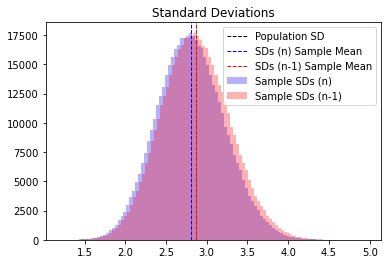

In [72]:
#Standard Deviations
plt.hist(sample_sdsn, bins = 100, color='blue', alpha=.3, label='Sample SDs (n)')
plt.hist(sample_sdsone, bins = 100, color='red', alpha=.3, label='Sample SDs (n-1)')
plt.axvline(popsd, color='black', linestyle='dashed', linewidth=1, label='Population SD')
plt.axvline(np.mean(sample_sdsn), color='blue', linestyle='dashed', linewidth=1, label='SDs (n) Sample Mean')
plt.axvline(np.mean(sample_sdsone), color='red', linestyle='dashed', linewidth=1, label='SDs (n-1) Sample Mean')
plt.title('Standard Deviations')
plt.legend()
plt.show()

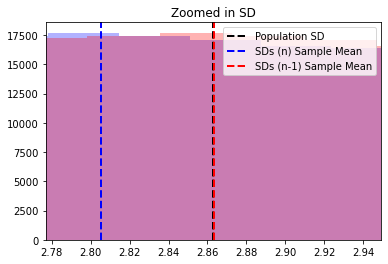

In [73]:
#Zoomed in SD
plt.hist(sample_sdsn, bins = 100, color='blue', alpha=.3)
plt.hist(sample_sdsone, bins = 100, color='red', alpha=.3)
plt.axvline(popsd, color='black', linestyle='dashed', linewidth=2, label='Population SD')
plt.axvline(np.mean(sample_sdsn), color='blue', linestyle='dashed', linewidth=2, label='SDs (n) Sample Mean')
plt.axvline(np.mean(sample_sdsone), color='red', linestyle='dashed', linewidth=2, label='SDs (n-1) Sample Mean')
plt.title('Zoomed in SD')
plt.legend()
plt.xlim([.97*popsd, 1.03*popsd])
plt.show()

In [ ]:
##Notes:

#As expected, the sample SD approaches the population SD by using (n-1) as opposed to (n)

#Interestingly on MAD, using (n) yields the sample MAD closer to the population MAD than (n-1)
#However, it does seem possible that (n) alone does underestimate the pop. MAD to some extent
#Perhaps there is another constant smaller than 1 that would make the sample MAD approach closer to the pop. MAD?